<a href="https://colab.research.google.com/github/Anchit-2002/Hate-Speech-Classification/blob/main/Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!unzip /content/dataset.zip

unzip:  cannot find or open /content/dataset.zip, /content/dataset.zip.zip or /content/dataset.zip.ZIP.


In [ ]:
import pandas as pd
imbalanced_data= pd.read_csv('/content/imbalanced_data.csv')
imbalanced_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# shape
imablanced_data = imbalanced_data.shape
print(imbalanced_data)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


<Axes: xlabel='label', ylabel='count'>

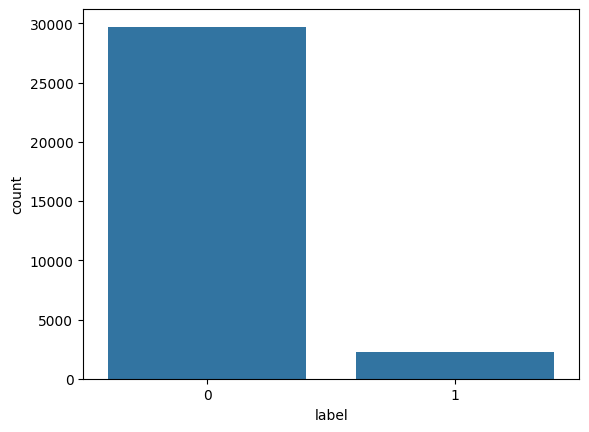

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=imbalanced_data)


In [ ]:
imbalanced_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
raw_data = pd.read_csv('/content/raw_data.csv')
raw_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
raw_data.drop(raw_data.iloc[:, 0:5], inplace=True, axis=1)
raw_data

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [ ]:
raw_data.rename(columns = {'class':'label'} , inplace =True)
raw_data

,label,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [ ]:
raw_data.isnull().sum()

,0
label,0
tweet,0


<Axes: xlabel='label', ylabel='count'>

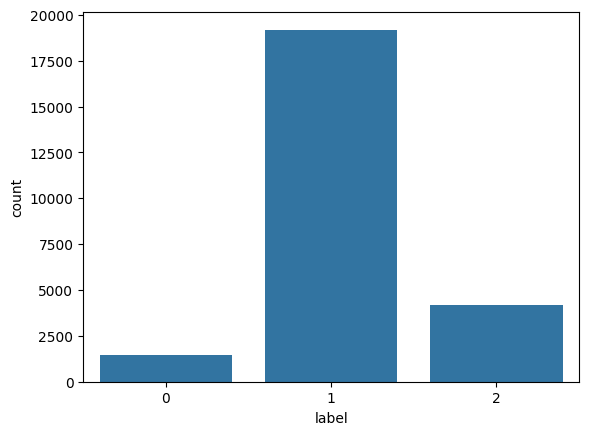

In [ ]:
sns.countplot(x='label', data=raw_data)


0 -> hate
1 -> abusive
2 -> no hate


In [ ]:
raw_data['label'].replace({0:1}, inplace= True)

<ipython-input-13-e81372c8520c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['label'].replace({0:1}, inplace= True)


In [ ]:
raw_data['label'].unique()

array([2, 1])

In [ ]:
raw_data['label'].replace({2:0}, inplace= True)

<ipython-input-15-7f70f2114f6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['label'].replace({2:0}, inplace= True)


<Axes: xlabel='label', ylabel='count'>

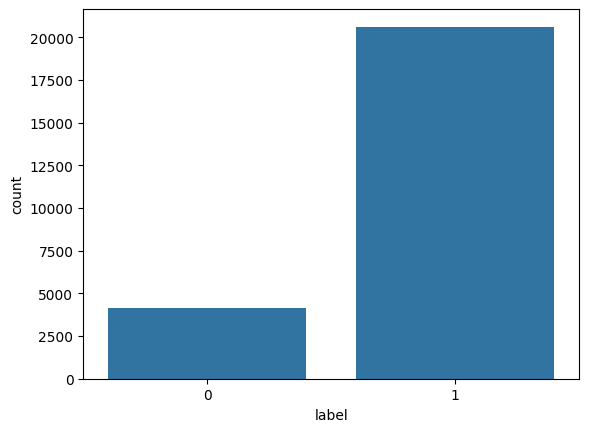

In [ ]:
sns.countplot(x='label', data=raw_data)

In [ ]:
# use merge in pandas
df = pd.concat([imbalanced_data, raw_data])



In [ ]:
df.to_csv('Combined_data.csv')
df

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is s...
1,2.0,0,@user @user thanks for #lyft credit i can't us...
2,3.0,0,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...
4,5.0,0,factsguide: society now #motivation
...,...,...,...
24778,NaN,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,NaN,0,"you've gone and broke the wrong heart baby, an..."
24780,NaN,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,NaN,1,youu got wild bitches tellin you lies


# Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()
stopword = set(stopwords.words('english'))



In [ ]:
def data_cleaning(words):
  words= str(words).lower()
  words= re.sub("@", ' ', words)
  words= re.sub(r'Ã°ÂŸÂ[^\s]*','',words)
  words= re.sub(r"[\xC3\xA0-\xC3\xBF]",'',words)
  words= re.sub('#','',words)
  words= re.sub('https?://\S+|www\.\S+', '', words)
  words= re.sub('<.*?>+', '', words)
  words = [word for word in words.split(' ') if words not in stopword]
  words=" ".join(words)
  words = [stemmer.stem(words) for word in words.split(' ')]
  words=" ".join(words)

  return words


In [ ]:
# let's apply the data_cleaning on the data.
df['tweet']= df['tweet'].apply(data_cleaning)

In [ ]:
df.drop('id', axis=1 ,inplace =True)

In [ ]:
df

,label,tweet
0,0,user when a father is dysfunctional and is s...
1,0,user user thanks for lyft credit i can't use...
2,0,bihday your majesti bihday your majesti ...
3,0,model i love u take with u all the time in u...
4,0,factsguide: society now motiv factsguide:...
...,...,...
24778,1,you's a muthaf***in lie &8220; lifeasking: 20...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like i ain...
24781,1,youu got wild bitches tellin you li youu got w...


# **Model Building**

In [ ]:
X= df['tweet']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(len(x_train), len(x_test))


45396 11349


NameError: name 'x_train' is not defined

In [ ]:
max_words = 50000
max_len = 300

In [ ]:
# define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.optimizers import RMSprop

# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()


In [ ]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(vectorized_list,y_train,batch_size=128,epochs = 1,validation_split=0.2)

In [ ]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)